This code covers loading data, splitting it into training and testing sets, training linear regression and logistic regression models, evaluating their performance, and analyzing different performance metrics including confusion matrices and ROC curves.








In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split

# Load a sample dataset (using the cereals dataset here for demonstration)
cereals_df = pd.read_csv('/content/Cereals.csv')

# Prepare features and target variable
features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']
target = 'rating'

X = cereals_df[features].fillna(cereals_df[features].mean())
y = cereals_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("Data Preparation Completed")


Data Preparation Completed


In [ ]:
!pip install dmba
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dmba import regressionSummary
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Detailed regression summary
regressionSummary(y_test, y_pred)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.9 MB/s eta 0:00:00
Colab environment detected.
Mean Absolute Error: 1.432509469999567
Mean Squared Error: 5.703450160499547
Root Mean Squared Error: 2.388189724561168

Regression statistics

                      Mean Error (ME) : 0.4282
       Root Mean Squared Error (RMSE) : 2.3882
            Mean Absolute Error (MAE) : 1.4325
          Mean Percentage Error (MPE) : 1.0253
Mean Absolute Percentage Error (MAPE) : 4.1544


Confusion Matrix:
 [[16  2]
 [ 2 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.85      0.85      0.85        13

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


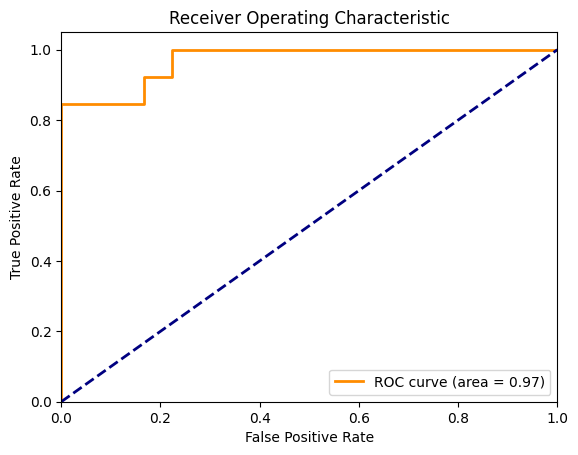

Confusion Matrix (Accuracy 0.8710)

            Prediction
     Actual  Low Rating High Rating
 Low Rating          16           2
High Rating           2          11


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from dmba import classificationSummary
import matplotlib.pyplot as plt

# Create a binary target variable for classification (e.g., high rating vs. low rating)
cereals_df['high_rating'] = (cereals_df['rating'] > cereals_df['rating'].median()).astype(int)
y_class = cereals_df['high_rating']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.4, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = log_reg.predict(X_test_class)
y_pred_prob = log_reg.predict_proba(X_test_class)[:, 1]

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_class, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Detailed classification summary
classificationSummary(y_test_class, y_pred_class, class_names=['Low Rating', 'High Rating'])


In [ ]:
# Cutoff analysis
cutoff = 0.5
predicted_class = ['High Rating' if p > cutoff else 'Low Rating' for p in y_pred_prob]

# Recompute confusion matrix with the new cutoff
conf_matrix_cutoff = confusion_matrix(y_test_class, [1 if p > cutoff else 0 for p in y_pred_prob])
class_report_cutoff = classification_report(y_test_class, [1 if p > cutoff else 0 for p in y_pred_prob])

print("Confusion Matrix with Cutoff 0.5:\n", conf_matrix_cutoff)
print("\nClassification Report with Cutoff 0.5:\n", class_report_cutoff)


Confusion Matrix with Cutoff 0.5:
 [[16  2]
 [ 2 11]]

Classification Report with Cutoff 0.5:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.85      0.85      0.85        13

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31

